In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.stats.mstats import mquantiles
from scipy.stats import kurtosis
from scipy.stats import probplot

In [3]:
# Set up plot styles
plt.style.use(['fivethirtyeight'])

In [4]:
df1 = pd.read_csv('babies.txt', delim_whitespace=True)
df2 = pd.read_csv('babies23.txt', delim_whitespace=True)

In [5]:
df1 = df1[df1.weight != 999]
min(df1['weight'])

87

In [6]:
df1.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1


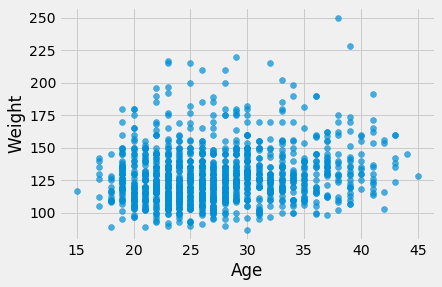

In [7]:
df1 = df1[(df1['weight'] < 999) & (df1['age'] < 99)]

age = np.array(df1['age'])
weight = np.array(df1['weight'])

plt.scatter(age, weight, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

In [8]:
bwt_ns_1= list(df1[df1['smoke'] == 0]['bwt'])
bwt_s_1 = list(df1[df1['smoke'] == 1]['bwt'])

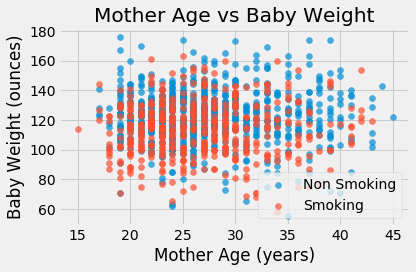

In [13]:
age = np.array(df1[df1['smoke'] == 0]['age'])
weight = np.array(df1[df1['smoke'] == 0]['bwt'])
plt.scatter(age, weight, alpha=0.7, label='Non Smoking')

age = np.array(df1[df1['smoke'] == 1]['age'])
weight = np.array(df1[df1['smoke'] == 1]['bwt'])
plt.scatter(age, weight, alpha=0.7, label='Smoking')

plt.xlabel('Mother Age (years)')
plt.ylabel('Baby Weight (ounces)')
plt.title('Mother Age vs Baby Weight')
plt.legend()
plt.tight_layout()
plt.savefig('scatter.png', dpi=420, )
plt.show()


In [14]:
bwt_ns = bwt_ns_1
bwt_s = bwt_s_1

Get hist arrays

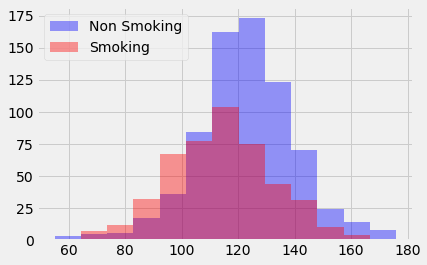

In [15]:
_, bins = np.histogram(np.stack([bwt_ns, bwt_ns]), bins=13)

plt.hist(bwt_ns, label='Non Smoking', bins=bins, alpha=0.4, color='blue')
plt.hist(bwt_s, label='Smoking', bins=bins, alpha=0.4, color='red')
plt.legend()
plt.show()

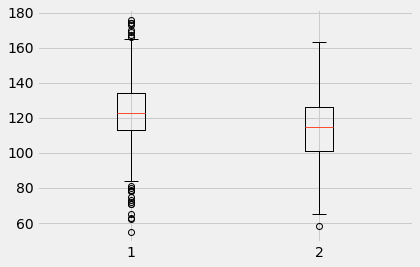

In [16]:
plt.boxplot([bwt_ns, bwt_s], )
plt.show()

In [17]:
print(np.mean(bwt_ns))
print(np.var(bwt_ns))

122.95724137931035
305.0698958382878


In [18]:
print(np.mean(bwt_s))
print(np.var(bwt_s))

113.9396551724138
334.4015309155767


In [19]:
bwt_ns_sample = np.random.choice(bwt_ns, 2000, replace=True)
bwt_s_sample = np.random.choice(bwt_ns, 2000, replace=True)

ttest_ind(bwt_ns_sample, bwt_s_sample, equal_var=True)

Ttest_indResult(statistic=0.3309014611189214, pvalue=0.7407362591131517)

In [20]:
len(bwt_ns)

725

In [21]:
len(bwt_s)

464

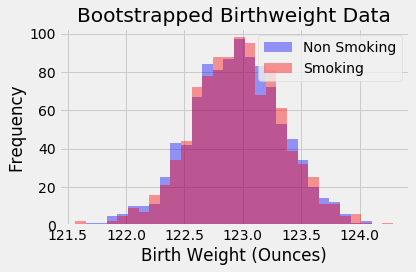

3.014079569854474
3.171704309472756


In [31]:
ns_means = []
s_means = []

for i in range(1000):
    ns_means.append(np.mean(np.random.choice(bwt_ns, 2000, replace=True)))
    s_means.append(np.mean(np.random.choice(bwt_ns, 2000, replace=True)))
    
_, bins = np.histogram(np.stack([ns_means, s_means]), bins=30)
plt.hist(ns_means, label='Non Smoking', bins=bins, alpha=0.4, color='blue')
plt.hist(s_means, label='Smoking', bins=bins, alpha=0.4, color='red')
plt.legend()


plt.title('Bootstrapped Birthweight Data')
plt.xlabel('Birth Weight (Ounces)')
plt.ylabel('Frequency')

plt.tight_layout()
# display plot
plt.savefig('bootstrap.png', dpi=420)
plt.show()

print(kurtosis(ns_means, fisher=False))
print(kurtosis(s_means, fisher=False))

In [23]:
mquantiles(bwt_ns)

array([113., 123., 134.])

In [14]:
mquantiles(bwt_s)

array([102., 115., 126.])

In [15]:
print(kurtosis(bwt_ns, fisher=False))
print(kurtosis(bwt_s, fisher=False))

4.037060312433822
2.988032478793404


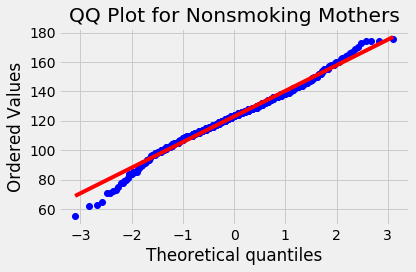

In [34]:
probplot(bwt_ns, plot=plt)

plt.title('QQ Plot for Nonsmoking Mothers')

plt.tight_layout()
# display plot
plt.savefig('qq_no_smoking.png', dpi=420)

plt.show()

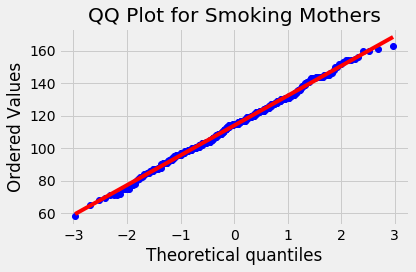

In [38]:
probplot(bwt_s, plot=plt)

plt.title('QQ Plot for Smoking Mothers')

plt.tight_layout()
# display plot
plt.savefig('qq_smoking.png', dpi=420)

plt.show()